# Data Visualization in audio files 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

import librosa
import librosa.display as lrd
import IPython.display as ipd

from itertools import cycle
from glob import glob

In [2]:
sns.set_theme(style='dark', palette=None)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [3]:
audio_files = glob('./recordings/*.wav')

In [4]:
audio_index = 0

In [5]:
ipd.Audio(audio_files[audio_index])

In [6]:
y, sr = librosa.load(audio_files[audio_index])

In [7]:
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [0.00100198 0.00088148 0.00067815 0.00066853 0.00099314 0.001548
 0.00207171 0.00235225 0.00238055 0.00233051]
shape y: (13029,)
sr: 22050


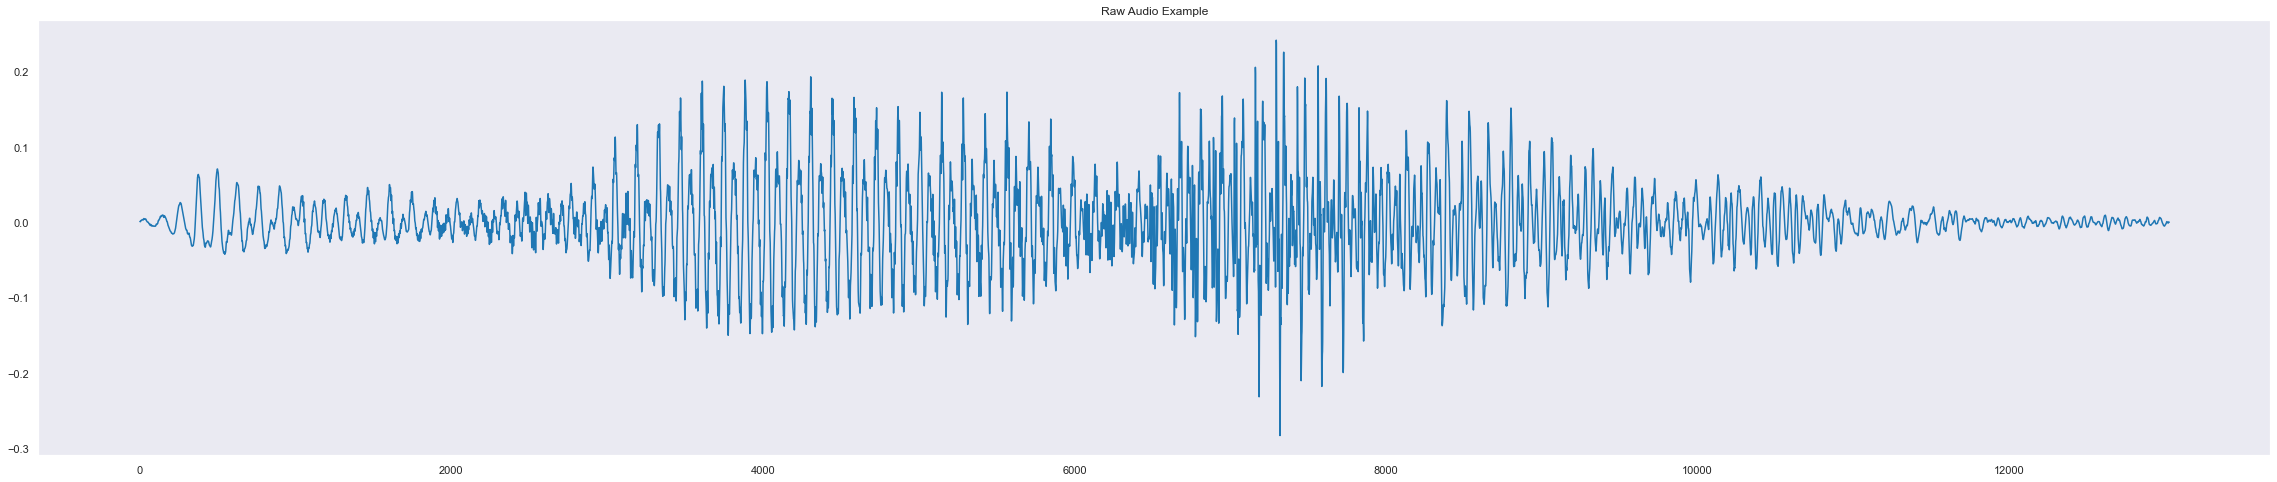

In [8]:
pd.Series(y).plot(figsize=(40, 8),
                  lw=1.5,
                  title='Raw Audio Example',
                  color = color_pal[0])
plt.show()

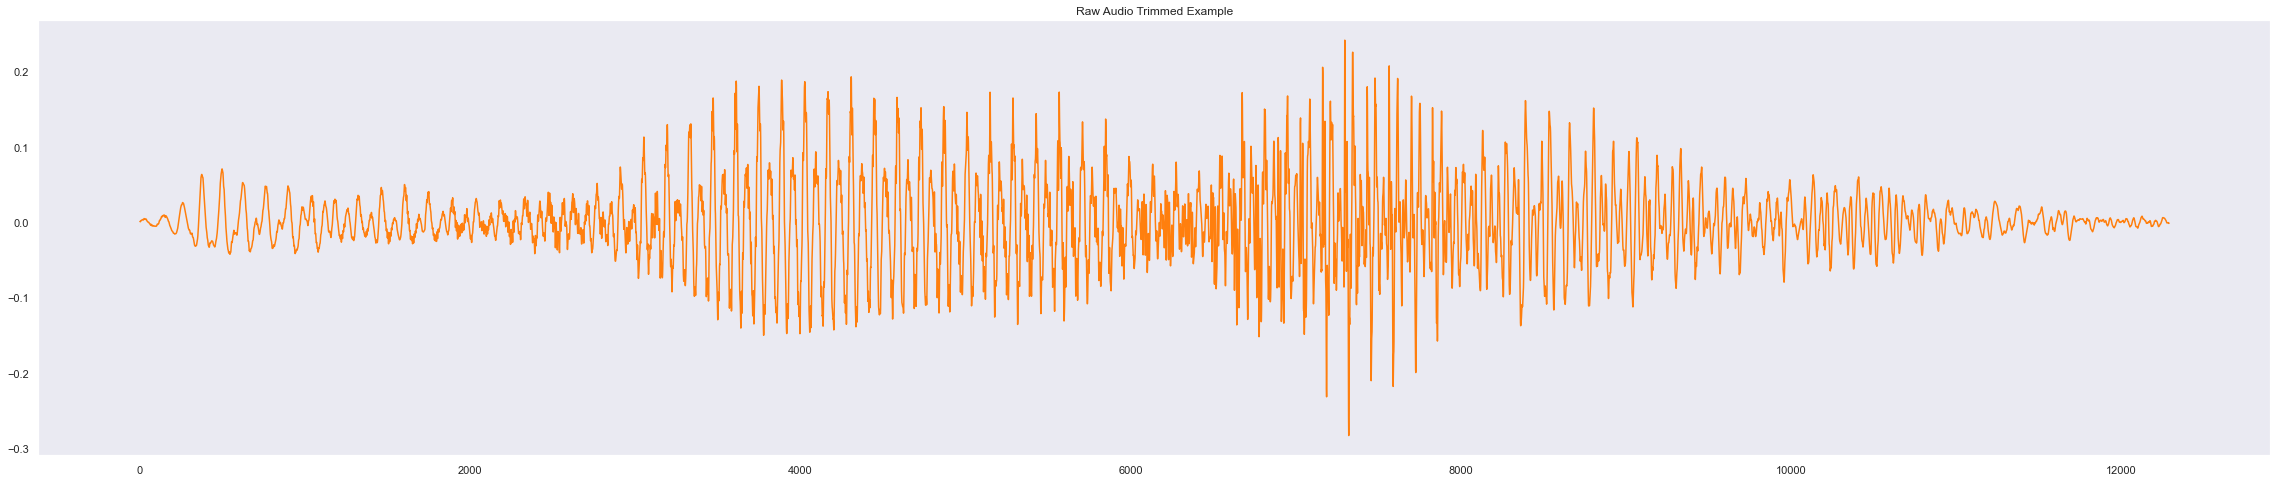

In [9]:
y_trimmed, _ = librosa.effects.trim(y, top_db=20)

pd.Series(y_trimmed).plot(figsize=(40, 8),
                  lw=1.5,
                  title='Raw Audio Trimmed Example',
                  color = color_pal[1])
plt.show()

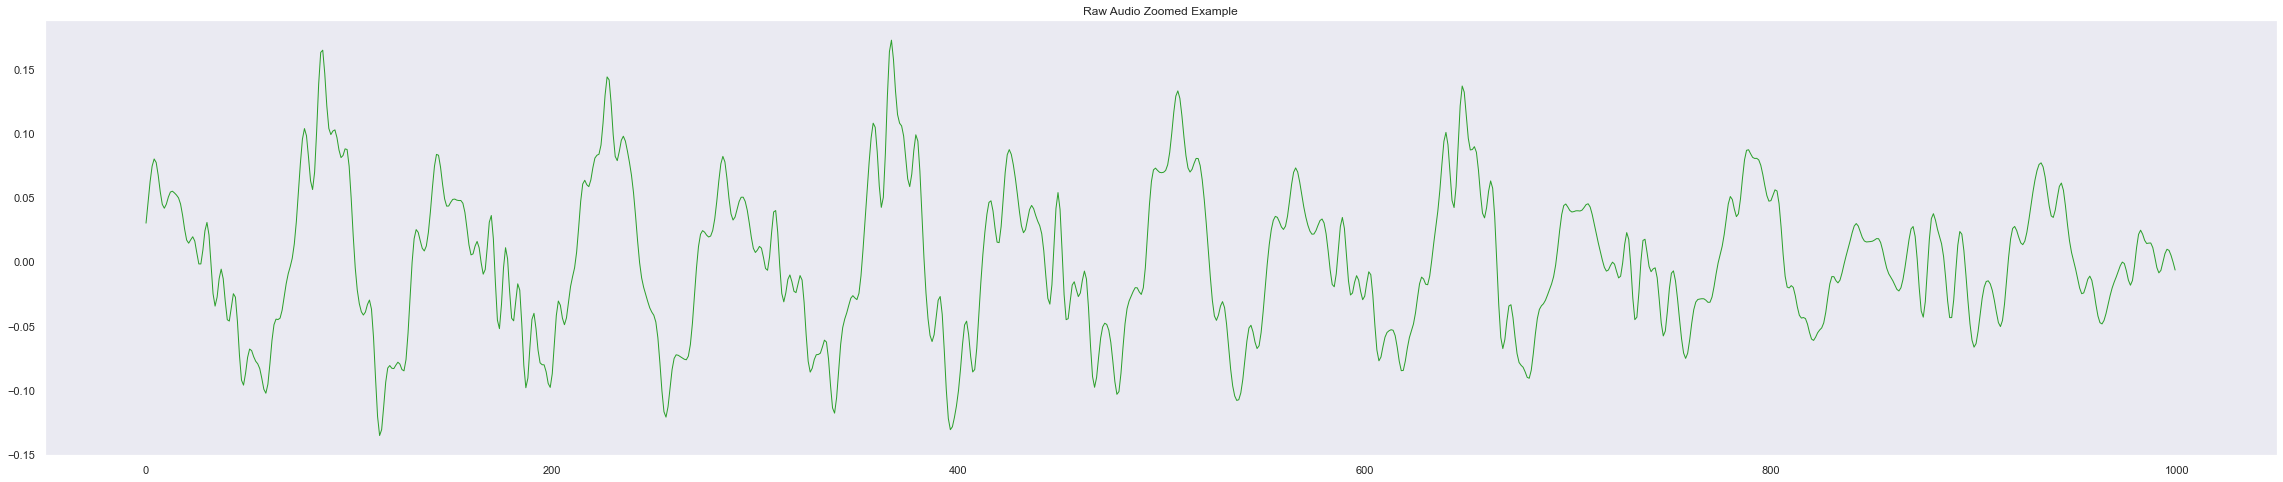

In [10]:
pd.Series(y_trimmed[5200:6200]).plot(figsize=(40, 8),
                  lw=1,
                  title='Raw Audio Zoomed Example',
                  color = color_pal[2])
plt.show()

# STFT

In [11]:
D = librosa.stft(y_trimmed)
S_db_power = librosa.power_to_db(np.abs(D), ref=np.max)
S_db_power.shape

(1025, 25)

In [12]:
D = librosa.stft(y_trimmed)
S_db_amplitude = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db_amplitude.shape

(1025, 25)

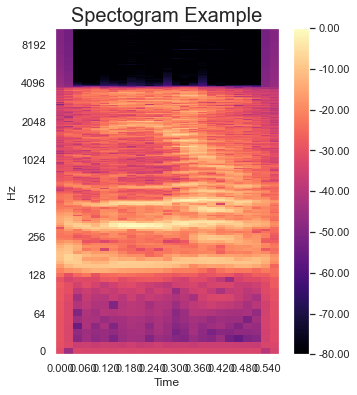

In [13]:
fig, ax = plt.subplots(figsize=(5, 6))
img = lrd.specshow(S_db_power,
                   x_axis='time',
                   y_axis='log',
                   ax=ax)
ax.set_title('Spectogram Example', fontsize = 20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

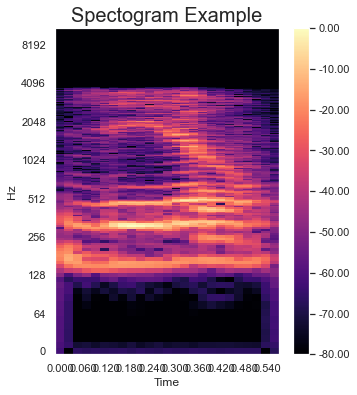

In [14]:
fig, ax = plt.subplots(figsize=(5, 6))
img = lrd.specshow(S_db_amplitude,
                   x_axis='time',
                   y_axis='log',
                   ax=ax)
ax.set_title('Spectogram Example', fontsize = 20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [15]:
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

C:\Users\Elara\AppData\Local\Temp\ipykernel_12516\4204200077.py:1: FutureWarning: Pass y=[0.00100198 0.00088148 0.00067815 ... 0.0003705  0.00049394 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128,)


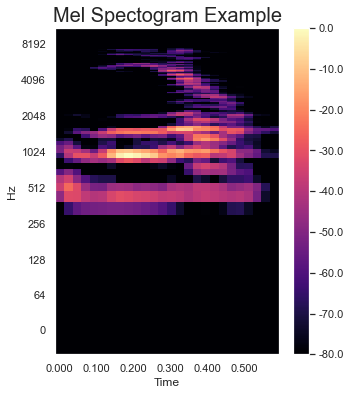

In [16]:
fig, ax = plt.subplots(figsize=(5, 6))
img = lrd.specshow(S_db_mel,
                   x_axis='time',
                   y_axis='log',
                   ax=ax)
ax.set_title('Mel Spectogram Example', fontsize = 20)
fig.colorbar(img, ax=ax, format=f'%0.1f')
plt.show()